## Image threshold

I found it's necessary to compare all kinds of threshold method. 

Basically, there are two types of things we want to get rid of: shadow and dirty road mark. We want to keep yellow and white lane color.

This is the best website: http://colorizer.org/

When you debug, it's important to also apply a mask to the image, so that you can have a very clear look at which color is selected, and thus you can adjust the color range accordingly.

### 1. Explore Color Spaces

Firstly, let's take a look at several color spaces and have a intuition about their channels. Since all of us are familiar with RGB space, we are now focusing on HLS, HSV and LUV spaces. You can also take a look at CIELAB space.

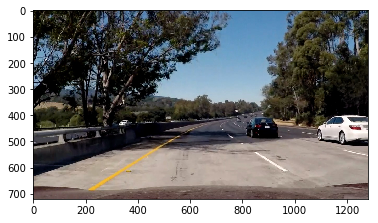

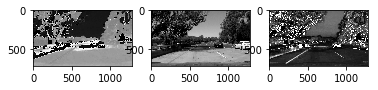

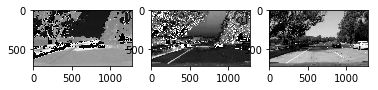

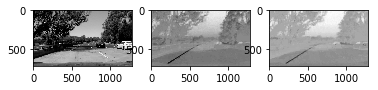

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./test_images/test5.jpg')
plt.imshow(img)
plt.show()

hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.imshow(hls[:,:,i], cmap='gray')
plt.show()
    
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.imshow(hsv[:,:,i], cmap='gray')
plt.show()

luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.imshow(luv[:,:,i], cmap='gray')
plt.show()

### 2. Threshold Image

Here are 3 image threshold methods. The first one is the method I learnt from Udacity. The second method is the one I used in project one. The third method is new. Let's take a look at its performance

In [12]:
# All of the threshold function return a binary mask image and a threshold image
def hls_thresh(img, s_thresh, r_thresh):
    # Yellow Line filter
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # White Line filter
    r_channel = img[:,:,0]
    r_binary = np.zeros_like(r_channel)
    r_binary[(r_channel >= r_thresh[0]) & (r_channel <= r_thresh[1])] = 1
    
    mask = np.zeros_like(s_channel)
    mask[(s_binary == 1) | (r_binary == 1)] = 1
    res = cv2.bitwise_and(img, img, mask=mask)
    return mask, res

def hsv_thresh(img, l_yellow, h_yellow, l_white, h_white):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    yellow = cv2.inRange(hsv, l_yellow, h_yellow)
    white = cv2.inRange(hsv, l_white, h_white)
    mask = cv2.bitwise_or(yellow, white)
    res = cv2.bitwise_and(img, img, mask=mask)
    return mask, res

def luv_thresh(img, l_yellow, h_yellow, l_white, h_white):
    luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
    yellow = cv2.inRange(luv, l_yellow, h_yellow)
    white = cv2.inRange(luv, l_white, h_white)
    mask = cv2.bitwise_or(yellow, white)
    res = cv2.bitwise_and(img, img, mask=mask)
    return mask, res

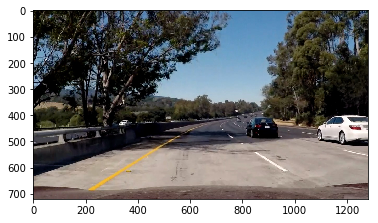

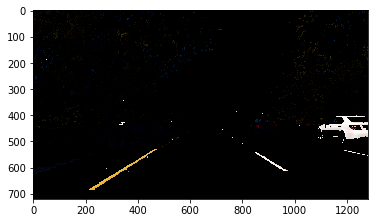

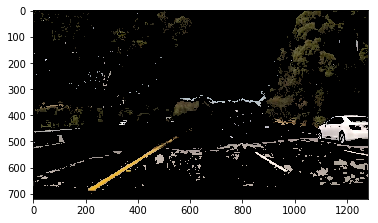

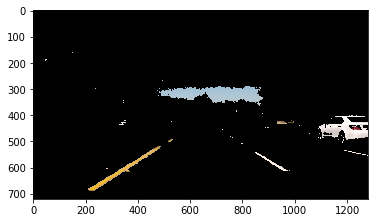

In [13]:
img = mpimg.imread('./test_images/test5.jpg')
plt.imshow(img)
plt.show()

mask, hls = hls_thresh(img, s_thresh=(170, 255), r_thresh=(220, 255))
plt.imshow(hls)
plt.show()

lower_yellow = np.array([15, 80 ,40])
upper_yellow = np.array([30, 255, 255])
lower_white = np.array([0, 0, 150])
upper_white = np.array([180, 30, 255])
mask, hsv = hsv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)
plt.imshow(hsv)
plt.show()


lower_yellow = np.array([0, 0 , 25])
upper_yellow = np.array([255, 95, 110])
lower_white = np.array([200, 0, 0])
upper_white = np.array([255, 255, 255])
mask, luv = luv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)
plt.imshow(luv)
plt.show()

It's very important to adjust the lower and upper value of the yellow and white filter. In order to do it efficiently, we'd better display the image with mask on it.

For the HSV mask, it seems that it picks not only yellow color but also green color, let's improve the lower and upper value.

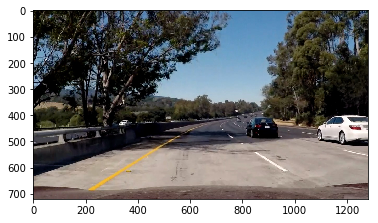

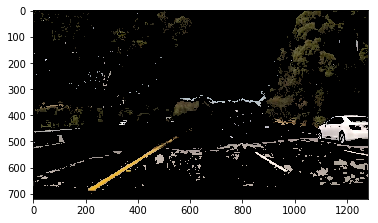

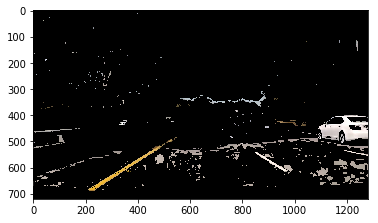

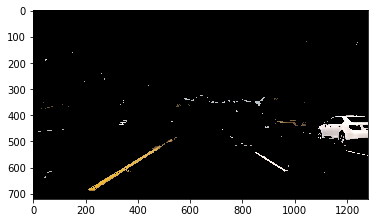

In [14]:
img = mpimg.imread('./test_images/test5.jpg')
plt.imshow(img)
plt.show()

lower_yellow = np.array([15, 80 ,40])
upper_yellow = np.array([30, 255, 255])
lower_white = np.array([0, 0, 150])
upper_white = np.array([180, 30, 255])
mask, hsv = hsv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)
plt.imshow(hsv)
plt.show()

lower_yellow = np.array([10, 100 ,90])
upper_yellow = np.array([22, 220, 255])
lower_white = np.array([0, 0, 150])
upper_white = np.array([180, 30, 255])
mask, hsv = hsv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)
plt.imshow(hsv)
plt.show()

lower_yellow = np.array([10, 100 ,90])
upper_yellow = np.array([22, 220, 255])
lower_white = np.array([0, 0, 180])
upper_white = np.array([180, 25, 255])
mask, hsv = hsv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)
plt.imshow(hsv)
plt.show()

In [15]:
def process_image(img):
    result = np.zeros_like(img)
    w = np.int(img.shape[1]/2)
    h = np.int(img.shape[0]/2)
    
    mask, hls = hls_thresh(img, s_thresh=(170, 255), r_thresh=(220, 255))
    
    lower_yellow = np.array([10, 100 ,90])
    upper_yellow = np.array([22, 220, 255])
    lower_white = np.array([0, 0, 180])
    upper_white = np.array([180, 25, 255])
    mask, hsv = hsv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)
    
    lower_yellow = np.array([0, 0 , 25])
    upper_yellow = np.array([255, 95, 110])
    lower_white = np.array([200, 0, 0])
    upper_white = np.array([255, 255, 255])
    mask, luv = luv_thresh(img, lower_yellow, upper_yellow, lower_white, upper_white)

    # Add image
    result[0:h, 0:w] = cv2.resize(img, (w, h))
    result[0:h, w:] = cv2.resize(hls, (w, h))
    result[h:, 0:w] = cv2.resize(hsv, (w, h))
    result[h:, w:] = cv2.resize(luv, (w, h))
    
    # Put channel name
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(result, "original", (30, 60), font, 1, (255, 255, 255), 2)
    cv2.putText(result, "hls", (w+30, 60), font, 1, (255, 255, 255), 2)
    cv2.putText(result, "hsv", (30, h+60), font, 1, (255, 255, 255), 2)
    cv2.putText(result, "luv", (w+30, h+60), font, 1, (255, 255, 255), 2)
    
    return result

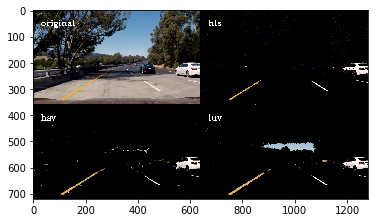

In [16]:
img = mpimg.imread('./test_images/test5.jpg')
result = process_image(img)
plt.imshow(result)
plt.show()

In [17]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [18]:
white_output = 'project_thresh.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_thresh.mp4
[MoviePy] Writing video project_thresh.mp4


100%|█████████▉| 1260/1261 [00:42<00:00, 29.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_thresh.mp4 

CPU times: user 1min 37s, sys: 14.5 s, total: 1min 51s
Wall time: 43.5 s


In [19]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [20]:
yellow_output = 'challenge_thresh.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('challenge_video.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video challenge_thresh.mp4
[MoviePy] Writing video challenge_thresh.mp4


100%|██████████| 485/485 [00:19<00:00, 24.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_thresh.mp4 

CPU times: user 40.7 s, sys: 6.38 s, total: 47.1 s
Wall time: 19.9 s


In [21]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [22]:
challenge_output = 'harder_challenge_thresh.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('harder_challenge_video.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video harder_challenge_thresh.mp4
[MoviePy] Writing video harder_challenge_thresh.mp4


100%|█████████▉| 1199/1200 [00:51<00:00, 20.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harder_challenge_thresh.mp4 

CPU times: user 1min 43s, sys: 15.8 s, total: 1min 59s
Wall time: 52.4 s


In [23]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

### Play with GUI

In this part, I will learn how to use GUI.

In [3]:
from ipywidgets import widgets
from IPython.display import display

In [6]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    '''Call back function'''
    print(text.value)
    
text.on_submit(handle_submit)

h


In [8]:
button = widgets.Button(description="Click me!")
display(button)

def on_button_clicked(sender):
    print("Click~")

button.on_click(on_button_clicked)

Click~
Click~
Click~


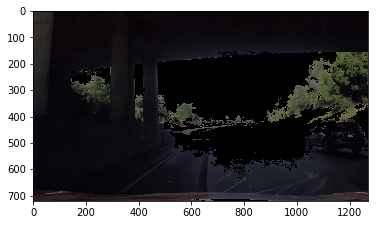

((0, 78, 73), (116, 255, 132), (127, 127, 127), (127, 127, 127))

In [57]:
from ipywidgets import interact

def mask(y_l1, y_l2, y_l3, y_u1, y_u2, y_u3, w_l1, w_l2, w_l3, w_u1, w_u2, w_u3):
    image = mpimg.imread('./test_images/bridge.jpg')
    img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lower_yellow = np.array([y_l1, y_l2, y_l3])
    upper_yellow = np.array([y_u1, y_u2, y_u3])
    yellow = cv2.inRange(img, lower_yellow, upper_yellow)
    
    lower_white = np.array([w_l1, w_l2, w_l3])
    upper_white = np.array([w_u1, w_u2, w_u3])
    white = cv2.inRange(img, lower_white, upper_white)
    
    mask = cv2.bitwise_or(yellow, white)
    res = cv2.bitwise_and(image, image, mask=mask)
    
    plt.imshow(res)
    plt.show()
    
    return (y_l1, y_l2, y_l3), (y_u1, y_u2, y_u3), (w_l1, w_l2, w_l3), (w_u1, w_u2, w_u3)

v = (0,255,1)

interact(mask, y_l1=v, y_l2=v, y_l3=v, y_u1=v, y_u2=v, y_u3=v, w_l1=v, w_l2=v, w_l3=v, w_u1=v, w_u2=v, w_u3=v)

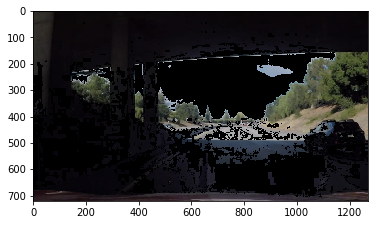

((10, 0, 0), (255, 255, 194), (127, 127, 127), (127, 127, 127))

In [58]:
from ipywidgets import interact

def mask(y_l1, y_l2, y_l3, y_u1, y_u2, y_u3, w_l1, w_l2, w_l3, w_u1, w_u2, w_u3):
    image = mpimg.imread('./test_images/bridge.jpg')
    img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([y_l1, y_l2, y_l3])
    upper_yellow = np.array([y_u1, y_u2, y_u3])
    yellow = cv2.inRange(img, lower_yellow, upper_yellow)
    
    lower_white = np.array([w_l1, w_l2, w_l3])
    upper_white = np.array([w_u1, w_u2, w_u3])
    white = cv2.inRange(img, lower_white, upper_white)
    
    mask = cv2.bitwise_or(yellow, white)
    res = cv2.bitwise_and(image, image, mask=mask)
    
    plt.imshow(res)
    plt.show()
    
    return (y_l1, y_l2, y_l3), (y_u1, y_u2, y_u3), (w_l1, w_l2, w_l3), (w_u1, w_u2, w_u3)

v = (0,255,1)

interact(mask, y_l1=v, y_l2=v, y_l3=v, y_u1=v, y_u2=v, y_u3=v, w_l1=v, w_l2=v, w_l3=v, w_u1=v, w_u2=v, w_u3=v)